Anggota Kelompok A :
1. Aditya Firmansyah 2006533143
2. Naufal Fachri Muhammad 2006533710
3. Zhafirah Tsany 2006572951
4. Nurul Qomariah Abdillah 2006463811
5. Muhammad Fabian Alkautsar 2006482653



## Tugas 1 (Menghilangkan Outlier Atas)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_price = pd.read_csv('https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/price.csv')
display(data_price.head())
data_price.drop('Observation', axis = 1, inplace = True)
display(data_price.head())
data_price['Parking'] = data_price['Parking'].astype('category')
data_price['City_Category'] = data_price['City_Category'].astype('category')
print(data_price.info())
print(data_price.isnull().sum())
print(data_price.duplicated().sum()) # mengecek apakah terdapat duplikasi
data_price.drop_duplicates(inplace=True) # Menghilangkan duplicate
print(data_price.duplicated().sum())

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Dist_Taxi      923 non-null    float64 
 1   Dist_Market    923 non-null    float64 
 2   Dist_Hospital  935 non-null    float64 
 3   Carpet         928 non-null    float64 
 4   Builtup        921 non-null    float64 
 5   Parking        936 non-null    category
 6   City_Category  936 non-null    category
 7   Rainfall       936 non-null    int64   
 8   House_Price    936 non-null    int64   
dtypes: category(2), float64(5), int64(2)
memory usage: 53.4 KB
None
Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64
4
0


(931, 9)


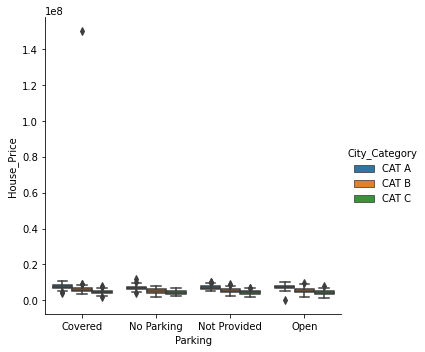

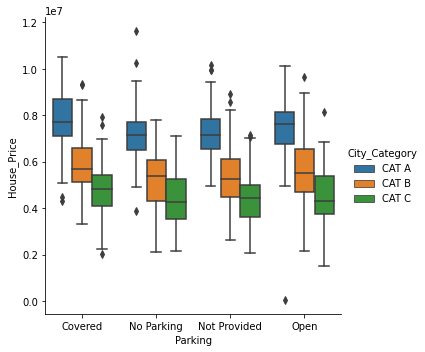

In [ ]:
sns.catplot(x = 'Parking', y = 'House_Price', data = data_price, hue = 'City_Category', kind = 'box')
outlier = np.abs(data_price['House_Price']-data_price['House_Price'].mean()) < (2*data_price.House_Price.std())
new = data_price[outlier]
print(new.shape)
sns.catplot(x = 'Parking', y = 'House_Price', data = new, hue = 'City_Category', kind = 'box')

In [ ]:
#men-slice data menjadi beberapa kategori dari variabel parking
covered = new[new['Parking']=='Covered']
No_parking = new[new['Parking']=='No Parking']
Not_provided = new[new['Parking']=='Not Provided']
Parking_open = new[new['Parking']=='Open']

(187, 9)
(108, 9)


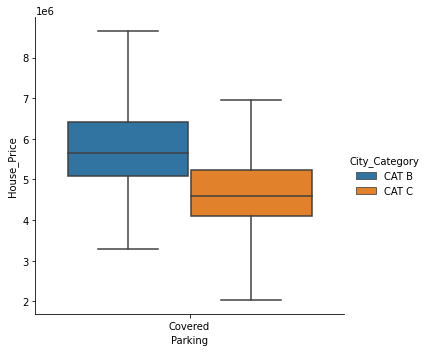

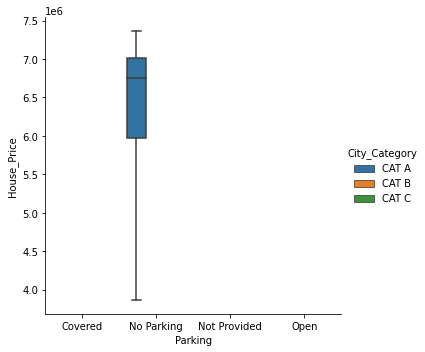

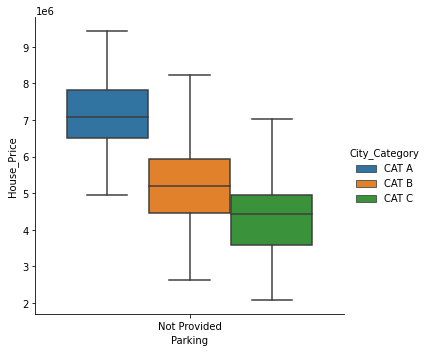

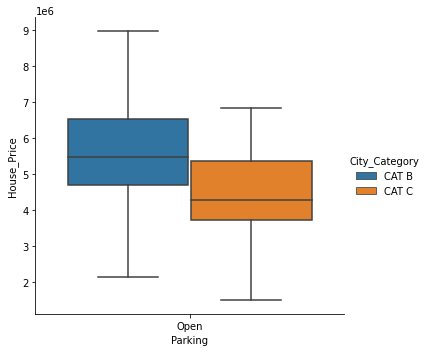

In [ ]:
city_cat = ['CAT B','CAT C']
Arr1 = []
for cat in city_cat : 
    Covered_CAT = covered[covered['City_Category'] == cat]
    Q1_Covered = Covered_CAT['House_Price'].quantile(0.25)
    Q3_Covered = Covered_CAT['House_Price'].quantile(0.75)
    IQR_covered = Q3_Covered - Q1_Covered
    lower_bound = Q1_Covered - 1.5*IQR_covered
    upper_bound = Q3_Covered + 1.5*IQR_covered
    new1 = Covered_CAT[Covered_CAT['House_Price']<= upper_bound]
    dict_covered = new1.to_dict()
    Arr1.append((dict_covered))
join1 = pd.concat([pd.DataFrame(Arr1[0]),pd.DataFrame(Arr1[1])], ignore_index = True)
join1_q1 = join1['House_Price'].quantile(0.25)
join1_q3 = join1['House_Price'].quantile(0.75)
join1_iqr = join1_q3 - join1_q1
print(covered.shape)
print(join1.shape)
sns.catplot(x = 'Parking', y= 'House_Price',data = join1, hue ='City_Category',kind = 'box', whis = 1.5*join1_iqr)

#No_Parking Category
Noparking_CAT = No_parking[No_parking['City_Category'] == "CAT A"]
Q1_Noparking = Noparking_CAT['House_Price'].quantile(0.25)
Q3_Noparking = Noparking_CAT['House_Price'].quantile(0.75)
IQR_Noparking = Q3_Noparking - Q1_Noparking
lower_bound_noparking = Q1_Noparking - 1.5*IQR_Noparking
upper_bound_noparking = Q3_Noparking + 1.5*IQR_Noparking
new2 = Noparking_CAT[Noparking_CAT['House_Price']<= upper_bound]
sns.catplot(x = 'Parking', y = 'House_Price', hue = 'City_Category',data = new2, kind = 'box', whis = 1.5*IQR_Noparking)

#Not_Provided Category
city_cat2 = ['CAT A','CAT B','CAT C']
Arr2 = []
for cat in city_cat2:
    Notprovided_CAT = Not_provided[Not_provided['City_Category'] == cat]
    Q1_Notprovided = Notprovided_CAT['House_Price'].quantile(0.25)
    Q3_Notprovided = Notprovided_CAT['House_Price'].quantile(0.75)
    IQR_Notprovided = Q3_Notprovided - Q1_Notprovided
    lower_bound_Notprovided = Q1_Notprovided - 1.5*IQR_Notprovided
    upper_bound_Notprovided = Q3_Notprovided + 1.5*IQR_Notprovided
    new3 = Notprovided_CAT[Notprovided_CAT['House_Price']<= upper_bound_Notprovided]
    dict_Notprovided = new3.to_dict()
    Arr2.append((dict_Notprovided))
join2 = pd.concat([pd.DataFrame(Arr2[0]),pd.DataFrame(Arr2[1]),pd.DataFrame(Arr2[2])], ignore_index = True)
join2_q1 = join2['House_Price'].quantile(0.25)
join2_q3 = join2['House_Price'].quantile(0.75)
join2_iqr = join2_q3 - join1_q1
sns.catplot(x = 'Parking', y= 'House_Price',data = join2, hue ='City_Category',kind = 'box', whis = 1.5*join2_iqr)

#Parking_open Category
city_cat3 = ['CAT B','CAT C']
Arr3 = []
for cat in city_cat3:
    Parkingopen_CAT = Parking_open[Parking_open['City_Category'] == cat]
    Q1_Parkingopen = Parkingopen_CAT['House_Price'].quantile(0.25)
    Q3_Parkingopen = Parkingopen_CAT['House_Price'].quantile(0.75)
    IQR_Parkingopen = Q3_Parkingopen - Q1_Parkingopen
    lower_bound_Parkingopen = Q1_Parkingopen - 1.5*IQR_Parkingopen
    upper_bound_Parkingopen = Q3_Parkingopen + 1.5*IQR_Parkingopen
    new4 = Parkingopen_CAT[Parkingopen_CAT['House_Price']<= upper_bound_Parkingopen]
    dict_Parkingopen = new4.to_dict()
    Arr3.append((dict_Parkingopen))
join3 = pd.concat([pd.DataFrame(Arr3[0]),pd.DataFrame(Arr3[1])], ignore_index = True)
join3_q1 = join3['House_Price'].quantile(0.25)
join3_q3 = join3['House_Price'].quantile(0.75)
join3_iqr = join3_q3 - join3_q1
sns.catplot(x = 'Parking', y= 'House_Price',data = join3, hue ='City_Category',kind = 'box', whis = 1.5*join3_iqr)

## Tugas 2 (Menghilangkan Outlier Bawah)

(187, 9)
(121, 9)


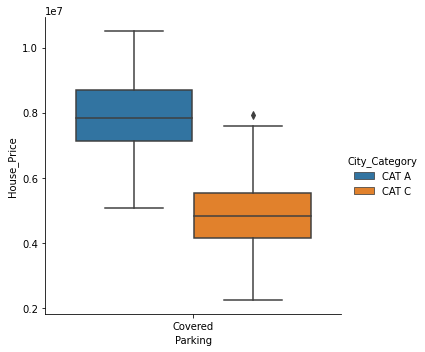

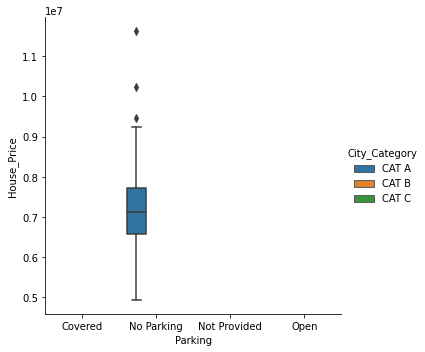

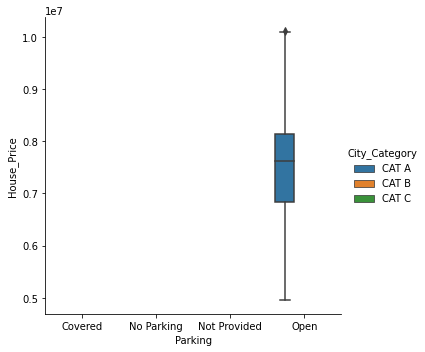

In [ ]:
#Covered Category
city_cat = ['CAT A','CAT C']
Arr1 = []
for cat in city_cat : 
    Covered_CAT = covered[covered['City_Category'] == cat]
    Q1_Covered = Covered_CAT['House_Price'].quantile(0.25)
    Q3_Covered = Covered_CAT['House_Price'].quantile(0.75)
    IQR_covered = Q3_Covered - Q1_Covered
    lower_bound = Q1_Covered - 1.5*IQR_covered
    upper_bound = Q3_Covered + 1.5*IQR_covered
    new1 = Covered_CAT[Covered_CAT['House_Price']>= lower_bound]
    dict_covered = new1.to_dict()
    Arr1.append((dict_covered))
join1 = pd.concat([pd.DataFrame(Arr1[0]),pd.DataFrame(Arr1[1])], ignore_index = True)
join1_q1 = join1['House_Price'].quantile(0.25)
join1_q3 = join1['House_Price'].quantile(0.75)
join1_iqr = join1_q3 - join1_q1
print(covered.shape)
print(join1.shape)
sns.catplot(x = 'Parking', y= 'House_Price',data = join1, hue ='City_Category',kind = 'box')

#No parking category

Noparking_CAT = No_parking[No_parking['City_Category'] == "CAT A"]
Q1_Noparking = Noparking_CAT['House_Price'].quantile(0.25)
Q3_Noparking = Noparking_CAT['House_Price'].quantile(0.75)
IQR_Noparking = Q3_Noparking - Q1_Noparking
lower_bound_noparking = Q1_Noparking - 1.5*IQR_Noparking
upper_bound_noparking = Q3_Noparking + 1.5*IQR_Noparking
new2 = Noparking_CAT[Noparking_CAT['House_Price']>= lower_bound_noparking]
sns.catplot(x = 'Parking', y = 'House_Price', hue = 'City_Category',data = new2, kind = 'box')

#Open Category
Parkingopen_CAT = Parking_open[Parking_open['City_Category'] == 'CAT A']
Q1_Parkingopen = Parkingopen_CAT['House_Price'].quantile(0.25)
Q3_Parkingopen = Parkingopen_CAT['House_Price'].quantile(0.75)
IQR_Parkingopen = Q3_Parkingopen - Q1_Parkingopen
lower_bound_Parkingopen = Q1_Parkingopen - 1.5*IQR_Parkingopen
upper_bound_Parkingopen = Q3_Parkingopen + 1.5*IQR_Parkingopen
new4 = Parkingopen_CAT[Parkingopen_CAT['House_Price']>= lower_bound_Parkingopen]
sns.catplot(x = 'Parking', y = 'House_Price', hue = 'City_Category',data = new4, kind = 'box')

# Tugas 3 (Data Tips)

## Number 1 and 2

1. Adakah tipe variabel yang kurang tepat pada data?

In [ ]:
tips = sns.load_dataset('tips')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Disini kita akan memeriksa tipe-tipe variabel yang terdapat pada data tips restaurant di atas 
# karena terkadang data yang tersedia disimpan sebagai string atau object. 
print(tips.dtypes)

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


Terlihat bahwa data dari tips sudah memiliki tipe data yang sesuai dengan variabelnya masing-masing. Namun, bisa juga mengubah tipe data kategorik menjadi numerik untuk memudahkan dalam membuat permodelan. Terlihat bahwa variabel sex, smoker, day, dan time memiliki tipe category sehingga diperlukan proses konversi untuk merubahnya menjadi bentuk numerikal. Maka tahap selanjutnya kita akan mengubah variabel kategorikal menjadi variabel numerik.

2. Apakah data numeriknya cenderung berdistribusi normal?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001602F144DC0>,
      dtype=object)

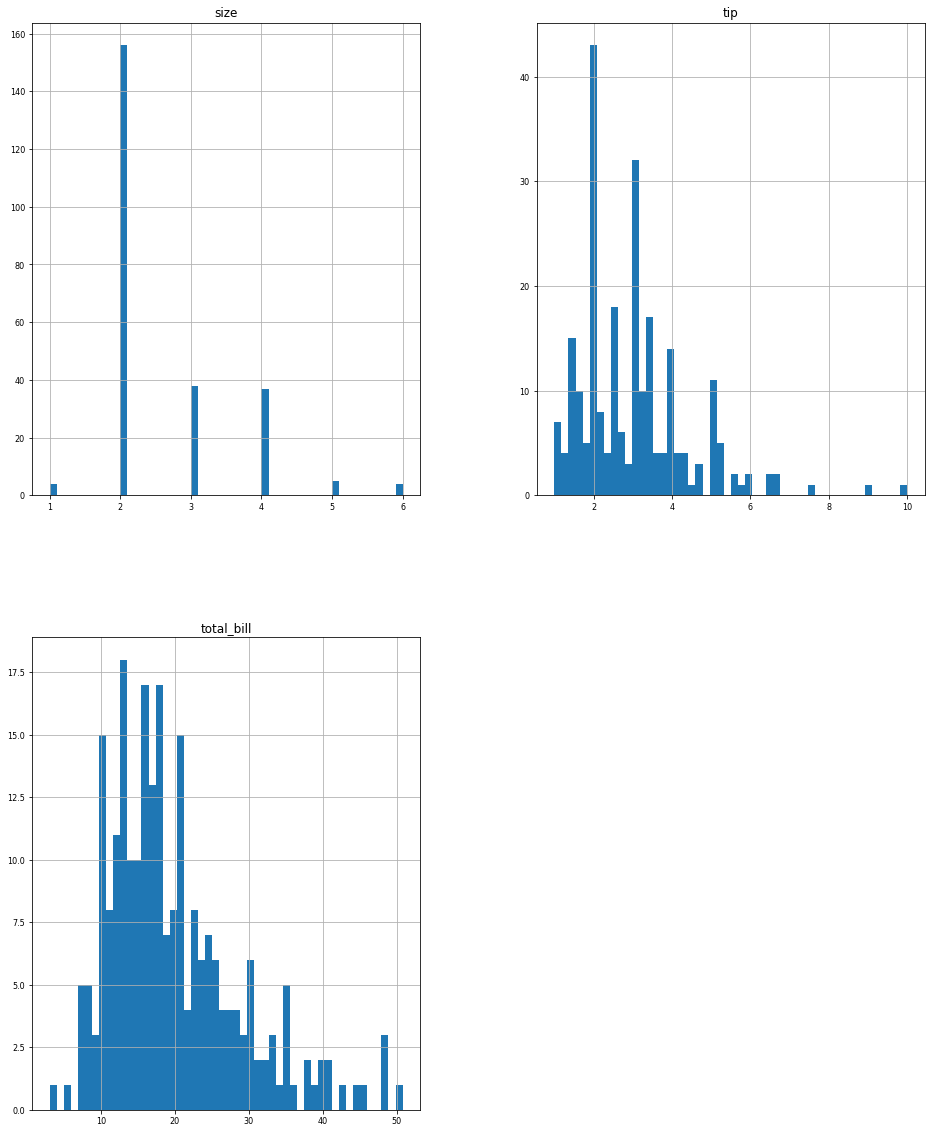

In [ ]:
tips_num = tips.select_dtypes(include = ['float64','int64'])
tips_num.head(5)
tips_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Distribusi normal memiliki bentuk yang simetris, artinya ekor di satu sisi merupakan bayangan cermin dari sisi lainnya. Akan tetapi data numerik diatas cenderung memiliki ekor yang lebih panjang di sisi kanan sehingga disebut right skewed distribution atau positively skewed distribution. Jadi data numerik di atas tidak cenderung berdistribusi normal.

# Number 3 and 4

In [ ]:
import seaborn as sns
import numpy as np

# Loading Contoh Data studi kasus pertama di atas
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

tips.head()

In [ ]:
tips.info()

3. Apakah ada outlier, noise, missing values, dan-atau duplikasi data?

In [ ]:
#mencari duplikasi
print(tips.shape)
tips.duplicated().sum()

In [ ]:
#mencari outlier
p = sns.distplot(tips['tip'], kde=True, rug=True)

In [ ]:
#mencari missing value
print(tips.isnull().sum())

Dari data diatas, dapat diketahui bahwa data memiliki duplikat dan outlier, tetapi tidak memiliki missing value

4.Apakah pelanggan pria dan wanita cenderung proporsional (balance)?

Dari keseluruhan data didapati bahwa pelanggan pria terdiri atas 64% dan pelanggan wanita terdiri atas 36%, maka terdapat kecenderungan bahwa pelanggan dari restoran tersebut adalah pria

In [ ]:
p= sns.catplot(x="sex", y="total_bill", data=tips)

# Number 5 and 6

5. Dari data apakah Pria atau Wanita ada kecenderungan memberikan tips lebih besar?

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB
None
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
1
0


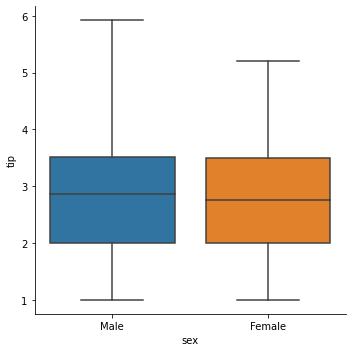

In [ ]:
tips_data = sns.load_dataset('tips')
display(tips_data.head())
print(tips_data.info())
print(tips_data.columns)
print(tips_data.isnull().sum())
print(tips_data.duplicated().sum())
tips_data.drop_duplicates(inplace = True)
print(tips_data.duplicated().sum())
# Removing the outliers
Q1 = tips_data['tip'].quantile(0.25)
Q3 = tips_data['tip'].quantile(0.75)
IQR = Q3 - Q1
upperbound = Q3 + 1.5*IQR
tips_data_new = tips_data[tips_data['tip'] <= upperbound] # data without outliers
sns.catplot(x = 'sex', y = 'tip', data = tips_data_new, kind = 'box', whis = 1.5*IQR)

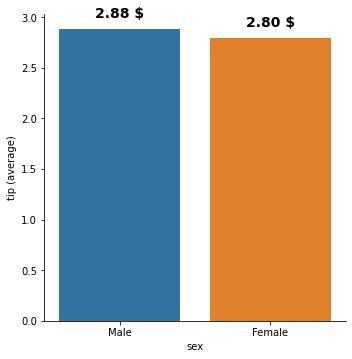

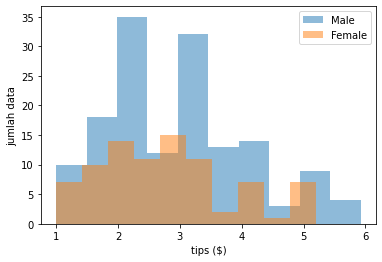

In [ ]:
tips_sex = sns.catplot(x = 'sex', y = 'tip', data = tips_data_new, kind = 'bar', ci = None)
tips_sex.set(ylabel = 'tip (average)') 
for i, bar in enumerate(tips_sex.ax.patches):
    h = bar.get_height()
    tips_sex.ax.text(
        i, # bar index (x coordinate of text)
        h+0.15, # y coordinate of text
        '{0:.2f} $'.format(h),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)
fig,ax = plt.subplots()
ax.hist(tips_data_new[tips_data_new['sex']=='Male']['tip'], label = 'Male', alpha = 0.5)
ax.hist(tips_data_new[tips_data_new['sex']=='Female']['tip'], label = 'Female', alpha = 0.5)
ax.set_xlabel('tips ($)')
ax.set_ylabel('jumlah data')
ax.legend()
plt.show()

kesimpulan : terlihat dari visualisasi data yang telah dilakukan, pria memiliki nilai rata-rata tips lebih dibandingkan dengan wanita yang dimana diukur dari rata-ratakan semua data.Namun, asumsi tersebut hanya diukur dari 2 variabel yaitu variabel 'sex' dan 'tip'. Jika dilihat dari perbandingan ditribusinya, terlihat Pria cenderung memberikan tips yang lebih dibandingkan dengan wanita dan memiliki jumlah proposi data yang lebih banyak dibandingkan wanita, sehingga hal tersebut menyebabkan nilai rata-rata tips pria lebih tinggi dibandingkan wanita dari semua hari.Namun, untuk menjelaskan lebih detail apa yang menyebabkan nilai rata-rata dan besarnya nilai tips berbeda,harus membutuhkan visualisasi lebih lanjut dengan variabel lainnya, contohnya memeriksa apakah besarnya total bil setiap orang (individu) berpengaruh pada besarnya tips yang diberikan? dan apakah waktu makan (dinner atau lunch) individu mempengaruhi besarnya tip?, dan masih banyak lagi.

6. dari data yang ada apakah ada kecenderungan tips lebih besardi hari- hari tertentu?

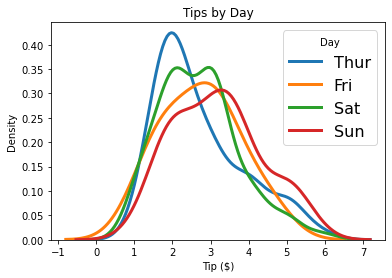

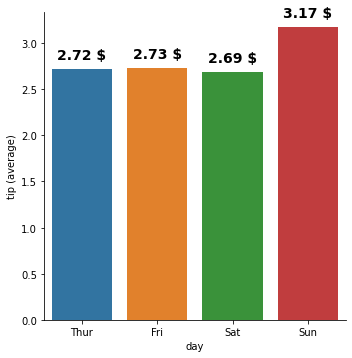

In [ ]:
days = ['Thur','Fri','Sat','Sun']
for day in days:
    # Subset to the airline
    subset = tips_data_new[tips_data_new['day'] == day]
    
    # Draw the density plot
    sns.distplot(subset['tip'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = day)

plt.legend(prop={'size': 16}, title = 'Day')
plt.title('Tips by Day')
plt.xlabel('Tip ($)')
plt.ylabel('Density')

tips_day = sns.catplot(x = 'day', y = 'tip', data = tips_data_new, kind = 'bar', ci = None)
tips_day.set(ylabel = 'tip (average)') 
for i, bar in enumerate(tips_day.ax.patches):
    h = bar.get_height()
    tips_day.ax.text(
        i, # bar index (x coordinate of text)
        h+0.15, # y coordinate of text
        '{0:.2f} $'.format(h),  # y label
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=14)
plt.show()

kesimpulan = terlihat pada visualisasi, nilai rata-rata dan density dari variabel tips untuk setiap harinya terdapat perbedaan. Pada hari minggu, terlihat nilai rata-rata tips dan memiliki nilai tips cenderung lebih tinggi dibandingkan dengan hari lainnya. Namun, untuk menjelaskan lebih detail apa yang menyebabkan nilai rata-rata dan besarnya nilai tips berbeda,harus membutuhkan visualisasi lebih lanjut dengan variabel lainnya, contohnya memeriksa apakah besarnya total bil setiap orang (individu) berpengaruh pada besarnya tips yang diberikan? dan apakah waktu makan (dinner atau lunch) individu mempengaruhi besarnya tip?, dan masih banyak lagi.

# Number 7 and 8

7. Dari data yang ada apakah customer perokok cenderung memberi tips lebih besar?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = 'tips.csv'
df = pd.read_csv(path)

In [ ]:
tips = sns.load_dataset('tips') # Loading dari SeaBorn library's dataset
# Ukuran Data
N, P = tips.shape
print('baris = ', N, ', Kolom = ', P)

print(tips)

In [ ]:
dfgab=tips[['tip','smoker']]
dfgab1=tips[['tip','day']]
dfgab3=tips[['tip','sex']]
dfgab2=tips[['tip','day','sex','smoker']]
print(dfgab)
print(dfgab1)
print(dfgab2)
print(dfgab3)

In [ ]:
#mengeluarkan outlier
Q1=tips['tip'].quantile(0.25)
Q3=tips['tip'].quantile(0.75)
IQR = Q3-Q1
upperbound = Q3+1.5*IQR
tips_new = tips[tips['tip']<= upperbound]
sns.catplot(x='smoker',y='tip',data=tips_new,kind='box',whis=1.5*IQR)


In [ ]:
#visualisasi data pelanggan merokok atau tidak dengan tips
tips_smoker = sns.catplot(x='smoker',y='tip',data=tips_new,kind='bar',ci = None)
tips_smoker.set(ylabel='tip(average)')
for i, bar in enumerate(tips_smoker.ax.patches):
  h = bar.get_height()
  tips_smoker.ax.text(
      i,
      h+0.15,
      '{0:.2f}$'.format(h),
      ha='center',
      va='center',
      fontweight='bold',
      size=14)
fig,ax=plt.subplots()
ax.hist(tips_new[tips_new['smoker']=='Yes']['tip'],label='Yes',alpha=0.5)
ax.hist(tips_new[tips_new['smoker']=='No']['tip'],label='No',alpha=0.5)
ax.set_xlabel('tips($)')
ax.set_ylabel('jumlah data')
ax.legend
plt.show


JAWABAN NO.7
Dari data yang ada, didapatkan bahwa rata-rata dalam pemberian tips untuk pelanggan yang merokok adalah 2.85 dolar 
sedangkan pemberian tips yang tidak merokok adalah 2.83 $ . Apabila dibulatkan, rata-rata pemberian pembeli yang merokok maupun tidak merokok hanya sedikit perbedaannya yaitu 0.02. Jadi, dari data tersebut tidak dapat dikatakan bahwa pelanggan yang merokok memberikan tip yang lebih besar karena rata-rata dari yang merokok maupun tidak merokok hampir sama besarnya untuk memberikan tip.

8. Apakah pola di nomer 5 dan 7 dipengaruhi hari?

In [ ]:
tips_day = sns.catplot(x='day',y='tip',data=tips_new,kind='bar',ci = None)
tips_day.set(ylabel='tip(average)')
for i, bar in enumerate(tips_day.ax.patches):
  h = bar.get_height()
  tips_day.ax.text(
      i,
      h+0.15,
      '{0:.2f}$'.format(h),
      ha='center',
      va='center',
      fontweight='bold',
      size=14)

In [ ]:
#mencari pola hari 
def groupedbarplot(df, width=0.8, annotate="values", ax=None, **kw):
    ax = ax or plt.gca()
    n = len(df.columns)
    w = 1./n
    pos = (np.linspace(w/2., 1-w/2., n)-0.5)*width
    w *= width
    bars = []
    for col, x in zip(df.columns, pos):
        bars.append(ax.bar(np.arange(len(df))+x, df[col].values, width=w, **kw))
        # matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
        for val, xi in zip(df[col].values, np.arange(len(df))+x):
            if annotate:
                txt = val if annotate == "values" else col
                ax.annotate(txt, xy=(xi, val), xytext=(0,2), 
                            textcoords="offset points",
                            ha="center", va="bottom")
    ax.set_xticks(np.arange(len(df)))
    ax.legend(['Male','Female'])
    ax.set_xticklabels(df.index)
    return bars

counts = tips_new.groupby(["smoker","day","sex"]).size().unstack()
plt.figure(figsize=(12,8))
groupedbarplot(counts)
plt.show()

JAWABAN NO.8

Pola pada nomer 5, yaitu pria atau wanita yang cenderung memberikan tips lebih besar serta pada nomer 7 yaitu pelanggan yang merokok atau tidak merokok yang memberikan tips lebih besar, menurut kelompok kami dipengaruhi oleh hari. Dimana, dapat dilihat bahwa pemasukkan untuk tips didapatkan paling banyak pada hari sabtu namun tidak berbeda jauh dengan hari minggu. Menurut kelompok kami, hal tersebut disebabkan karena weekend semakin banyak pelanggan yang datang ke cafe dibandingkan dengan weekdays. Jadi, menurut kelompok kami pada nomer 5 dan 7 dipengaruhi pola, yaitu pada saat weekend lebih banyak pendapatan tips nya dibandingkan pada saat weekdays

# Number 9 and 10

9.Pola apalagi yang dapat Anda temukan?

,total_bill,tip,size
total_bill,1.000000,0.596727,0.581284
tip,0.596727,1.000000,0.447869
size,0.581284,0.447869,1.000000


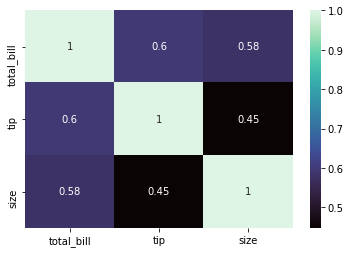

In [ ]:
#untuk mencari pola lain yang dapat ditemukan dari data, dapat menggunakan heatmap untuk mencari korelasi antara variabel
corr = tips_data_new.corr()
display(corr)
sns.heatmap(corr, annot = True, cmap = 'mako')

terlihat dari visualiasasi Heatmap menunjukkan dengan jelas bagaimana variabel-variabel berkorelasi antar satu dengan yang lainnya, jika nilai korelasi suatu pasangan variabel mendekati 1 , maka ada hubungan positif dari dua variabel tersebut, dan jika mendekati, maka kurang adanya hubungan positif dari dua variabel. terlihat variabel total_bil dan tip memeiliki nilai korelasi mendekati 1, sehingga dibutuhkannya visualisasi yang tepat untuk menunjukkan korelasi antar variabel tersebut (conothnya = scatterplot) dan sama halnya dengan variable total_bil dengan size yang memiliki nilai korelasi mendekati 1, sehingga dibutuhkan visualisasi yang tepat unutk menunjukkan korelasi antar variabel (contohnya = dengan scatterplot)

10.Saran apa yang akan Anda berikan untuk pemilik restaurant?
- Perbanyak ruangan tidak merokoknya;
- Perbanyak pekerja atau pelayan di akhir pekan;
- siapkan lebih banyak bahan makanan untuk makan malam;
- siapkan suasana yang tepat untuk makan malam;
- bersiap kedatangan pelanggan di hari kerja pada saat makan siang